<a href="https://colab.research.google.com/github/hopedom/DS5/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install optuna

In [2]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

modu_ds_5_house_prices_prediction_path = kagglehub.competition_download('modu-ds-5-house-prices-prediction')

print('Data source import complete.')


Data source import complete.


![image.png](attachment:9616b707-053d-48bd-a220-f80f536f10ac.png)



# House Prices Prediction
---
[회귀] 주택 가격 예측
- 예측할 값(y): SalePrice
- 평가지표: RMSE

평가지표
- 데이터 이해 및 탐색 : SalePrice와 주요 변수들의 분포를 시각화를 통해서 파악했는가?

- 데이터 전처리 과정 : 결측치 및 이상치를 처리하고 스케일링 및 인코딩을 적절히 수행했는가?

- 모델 선택 및 비교 : 3개 이상의 모델을 학습시키고 성능 비교했는가?

- 여러 모델을 앙상블을 통해 결합하여 성능을 비교했는가?

- Ridge/Lasso 등의 규제 추가, 트리 기반 모델의 깊이/학습률 등을 조정하여 성능 향상을 시도했는가?


데이터 필드 설명

- SalePrice	주택의 판매 가격(달러). 예측해야 하는 타겟 변수
- MSSubClass	건물 등급(건물 종류 분류)
- MSZoning	토지 용도 구분(일반적인 구역 분류)
- LotFrontage	도로에 접한 토지 길이 (피트 단위)
- LotArea	토지 면적 (평방 피트)
- Street	도로 접근 방식
- Alley	골목(후면 도로) 접근 방식
- LotShape	토지의 전반적인 모양
- LandContour	토지의 평탄도
- Utilities	사용 가능한 공공시설(전기, 수도 등)
- LotConfig	토지 배치 형태
- LandSlope	토지의 경사도
- Neighborhood	Ames 시 내의 물리적 위치(주변 지역)
- Condition1	주요 도로·철도에 대한 근접도
- Condition2	두 번째 주요 도로·철도에 대한 근접도
- BldgType	주거 건물 유형 (단독, 다세대 등)
- HouseStyle	주택의 건축 양식
- OverallQual	자재 및 마감 품질 종합 평가
- OverallCond	주택의 전반적인 상태 평가
- YearBuilt	최초 건축 연도
- YearRemodAdd	리모델링/개조 연도
- RoofStyle	지붕 스타일
- RoofMatl	지붕 재료
- Exterior1st	외장 마감재(주 재료)
- Exterior2nd	외장 마감재(보조 재료, 2번째)
- MasVnrType	석조 베니어 타입
- MasVnrArea	석조 베니어 면적 (평방 피트)
- ExterQual	외장재 품질 평가
- ExterCond	외장재 상태 평가
- Foundation	기초(Foundation) 유형
- BsmtQual	지하실 높이 평가
- BsmtCond	지하실 상태 평가
- BsmtExposure	지하실 외부 노출 여부(출입구/창문 등)
- BsmtFinType1	주요 지하실 마감 구역 유형
- BsmtFinSF1	주요 지하실 마감 면적 (평방 피트)
- BsmtFinType2	보조 지하실 마감 구역 유형
- BsmtFinSF2	보조 지하실 마감 면적 (평방 피트)
- BsmtUnfSF	미완성 지하실 면적 (평방 피트)
- TotalBsmtSF	지하실 전체 면적 (평방 피트)
- Heating	난방 시스템 종류
- HeatingQC	난방 품질 및 상태
- CentralAir	중앙 에어컨 설치 여부
- Electrical	전기 시스템 종류
- 1stFlrSF	1층 면적 (평방 피트)
- 2ndFlrSF	2층 면적 (평방 피트)
- LowQualFinSF	저품질 마감 공간 면적 (전체 층 합산)
- GrLivArea	지상(Above grade) 생활 공간 면적 (평방 피트)
- BsmtFullBath	지하실 완비 욕실 수
- BsmtHalfBath	지하실 반 욕실 수
- FullBath	지상 완비 욕실 수
- HalfBath	지상 반 욕실 수
- Bedroom	지하실 제외 침실 수
- Kitchen	주방 수
- KitchenQual	주방 품질
- TotRmsAbvGrd	지상 전체 방 개수 (욕실 제외)
- Functional	주택 기능성 평가
- Fireplaces	벽난로 개수
- FireplaceQu	벽난로 품질
- GarageType	차고 위치(유형)
- GarageYrBlt	차고 건축 연도
- GarageFinish	차고 내부 마감 상태
- GarageCars	차고 크기 (주차 가능 차량 수)
- GarageArea	차고 면적 (평방 피트)
- GarageQual	차고 품질
- GarageCond	차고 상태
- PavedDrive	포장 진입로 여부
- WoodDeckSF	목재 데크 면적 (평방 피트)
- OpenPorchSF	오픈 현관 면적 (평방 피트)
- EnclosedPorch	밀폐된 현관 면적 (평방 피트)
- 3SsnPorch	3계절용 현관 면적 (평방 피트)
- ScreenPorch	스크린 현관 면적 (평방 피트)
- PoolArea	수영장 면적 (평방 피트)
- PoolQC	수영장 품질
- Fence	울타리 품질
- MiscFeature	기타 특수 기능
- MiscVal	기타 기능의 금전적 가치
- MoSold	판매 월
- YrSold	판매 연도
- SaleType	판매 유형
- SaleCondition	판매 조건

# 데이터 확인 및 불러오기
---

In [4]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# kaggle
# train_df = pd.read_csv('/kaggle/input/modu-ds-5-house-prices-prediction/train.csv')
# test_df = pd.read_csv('/kaggle/input/modu-ds-5-house-prices-prediction/test.csv')

# colab
train_df = pd.read_csv(modu_ds_5_house_prices_prediction_path + '/train.csv')
test_df = pd.read_csv(modu_ds_5_house_prices_prediction_path + '/test.csv')

In [5]:
print('--- Training set --- \n')
display(train_df)

print('--- Test set --- \n')
display(test_df)

--- Training set --- 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,Unf,0,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1955.0,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,120,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,6,1987,1987,Gable,CompShg,HdBoard,HdBoard,BrkFace,72.0,TA,TA,CBlock,Gd,Gd,No,GLQ,980,LwQ,40,92,1112,GasA,Gd,Y,SBrkr,1137,0,0,1137,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,Unf,2,551,TA,TA,Y,125,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,7,1949,2006,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0,Unf,0,672,672,GasA,Ex,Y,SBrkr,672,252,0,924,0,0,1,0,3,1,TA,6,Typ,1,Po,Detchd,2003.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,122900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,50,RM,63.0,11426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1362,1362,GasA,Ex,Y,SBrkr,1362,720,0,2082,0,0,2,1,3,1,Gd,6,Mod,0,NaN,Detchd,2003.0,Unf,2,484,TA,TA,N,280,238,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,200000
1164,447,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247,Rec,713,557,1517,GasA,Ex,Y,SBrkr,1888,0,0,1888,0,0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2,578,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190000
1165,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,479.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1358,Unf,0,223,1581,GasA,Ex,Y,SBrkr,1601,0,0,1601,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,670,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1166,641,120,RL,62.0,12677,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,8,5,2003,2004,Hip,CompShg,MetalSd,MetalSd,BrkFace,472.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1218,Unf,0,3

--- Test set --- 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1991,1992,Hip,CompShg,HdBoard,HdBoard,BrkFace,284.0,Gd,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1288,1288,GasA,Ex,Y,SBrkr,1301,1116,0,2417,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1991.0,Unf,2,462,TA,TA,Y,127,82,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,BrkFace,290.0,Gd,TA,PConc,Gd,TA,No,GLQ,565,Unf,0,638,1203,GasA,Ex,Y,SBrkr,1214,1306,0,2520,0,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,1995.0,RFn,3,721,TA,TA,Y,224,114,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,576,576,GasA,Gd,Y,SBrkr,902,808,0,1710,0,0,2,0,3,1,TA,9,Typ,0,NaN,Detchd,1990.0,Unf,2,480,TA,TA,Y,12,11,64,0,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Fin,5,5,1947,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,442,Unf,0,390,832,GasA,TA,Y,SBrkr,832,384,0,1216,0,0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1947.0,Unf,1,336,TA,TA,Y,158,0,102,0,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1271,40,RL,NaN,23595,Pave,NaN,Reg,Low,AllPub,Inside,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,6,1979,1979,Shed,WdShake,Plywood,Plywood,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1258,Unf,0,74,1332,GasA,TA,Y,SBrkr,1332,192,0,1524,2,0,0,1,0,1,Gd,4,Typ,1,TA,Attchd,1979.0,Fin,2,586,TA,TA,Y,268,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
288,903,60,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,783,783,GasA,Ex,Y,SBrkr,807,702,0,1509,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2003.0,Fin,2,393,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
289,1019,80,RL,NaN,10784,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,BrkFace,76.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,802,670,0,1472,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1991.0,RFn,2,402,TA,TA,Y,164,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
290,312,20,RL,50.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1948,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,680,Unf,0,292,972,GasA,Ex,Y,SBrkr,972,0,0,972,1,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1948.0,Unf,1,240,TA,TA

In [6]:
print("\n--- Training set --- ")
train_df.info()
print("\n--- Test set --- ")
test_df.info()


--- Training set --- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    950 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null 

# 데이터 이해 및 탐색

**특징별 분포**

In [7]:
def categorize_features(df):
    df_copy = df.copy()

    numeric_features = df_copy.select_dtypes(include=np.number).columns.tolist()
    categorical_features = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()
    boolean_features = df_copy.select_dtypes(include=['bool']).columns.tolist()

    return numeric_features, categorical_features, boolean_features

def plot_feature_distributions(df: pd.DataFrame, type: ['numeric', 'categorical', 'all'] = 'all'):
    df_copy = df.copy()

    if type == 'numeric':
        features = df_copy.select_dtypes(include=['number']).columns
    elif (type == 'categorical') | (type == 'bool'):
        features = df_copy.select_dtypes(include=['object', 'category', 'bool']).columns
    else: # 'all'
        features = df_copy.columns

    if len(features) == 0:
        print(f"No {type} features found in the DataFrame.")
        return

    num_features = len(features)
    cols = 3
    rows = (num_features + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))

    if num_features > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    for i, col in enumerate(features):
        ax = axes[i]

        if pd.api.types.is_numeric_dtype(df_copy[col]):
            sns.histplot(data=df_copy, x=col, kde=True, ax=ax)
            ax.set_title(f'Distribution of {col} (Numeric)')
        elif pd.api.types.is_categorical_dtype(df_copy[col]) or pd.api.types.is_object_dtype(df_copy[col]):
            sns.countplot(data=df_copy, x=col, ax=ax, order=df_copy[col].value_counts().index)
            ax.set_title(f'Distribution of {col} (Categorical)')
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.set_title(f'{col} (Unsupported Type)')
            ax.axis('off')

    for j in range(i + 1, len(axes)):
        if isinstance(axes[j], plt.Axes):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [8]:
numeric_features, categorical_features, boolean_features = categorize_features(train_df)

print(f'categorical feature({len(categorical_features)}): {categorical_features}')
print(f'numeric feature({len(numeric_features)}): {numeric_features}')
print(f'boolean feature({len(boolean_features)}): {boolean_features}')

categorical feature(43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
numeric feature(38): ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars'

## **범주형 특징 분포**

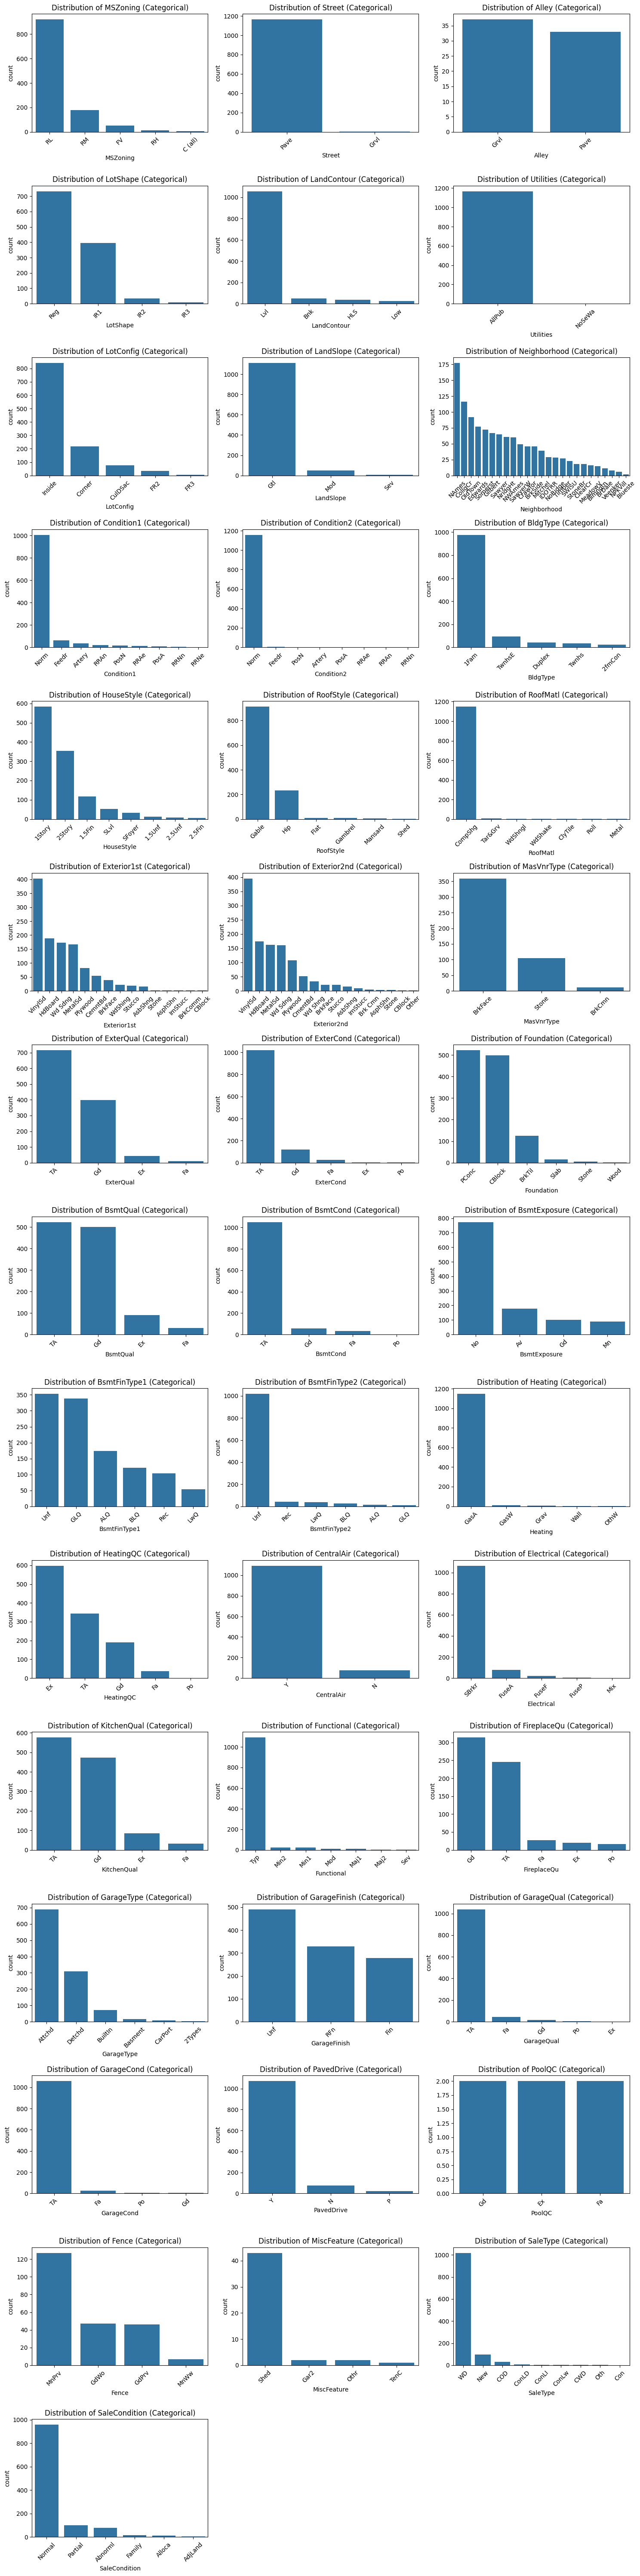

In [9]:
# distribution of categorical features (countplot)
plot_feature_distributions(train_df[categorical_features])

- 빈도수가 적은 카테고리는 원활할 모델 학습에 어렵다고 판단되어, 별도의 카테고리를 정의하거나 기존 카테고리로 통합 필요  
  - 대상 특징: 토지 용도 구분(`MSZoning`), 토지 모양(`LotShape`), 토지 평탄도(`LandContour`), 토지 배치 형태(`LotConfig`), 토지 경사도(`LandSlope`), 주변 지역(`Neighborhood`), 도로철도 근접도#1(`Condition1`), 도로철도 근접도#2(`Condition2`), 건물 유형(`BldgType`), 건축 양식(`HouseStyle`), 지붕스타일(`RoofStyle`), 지붕재료(`Roofmatl`)

## **수치형 특징 분포**

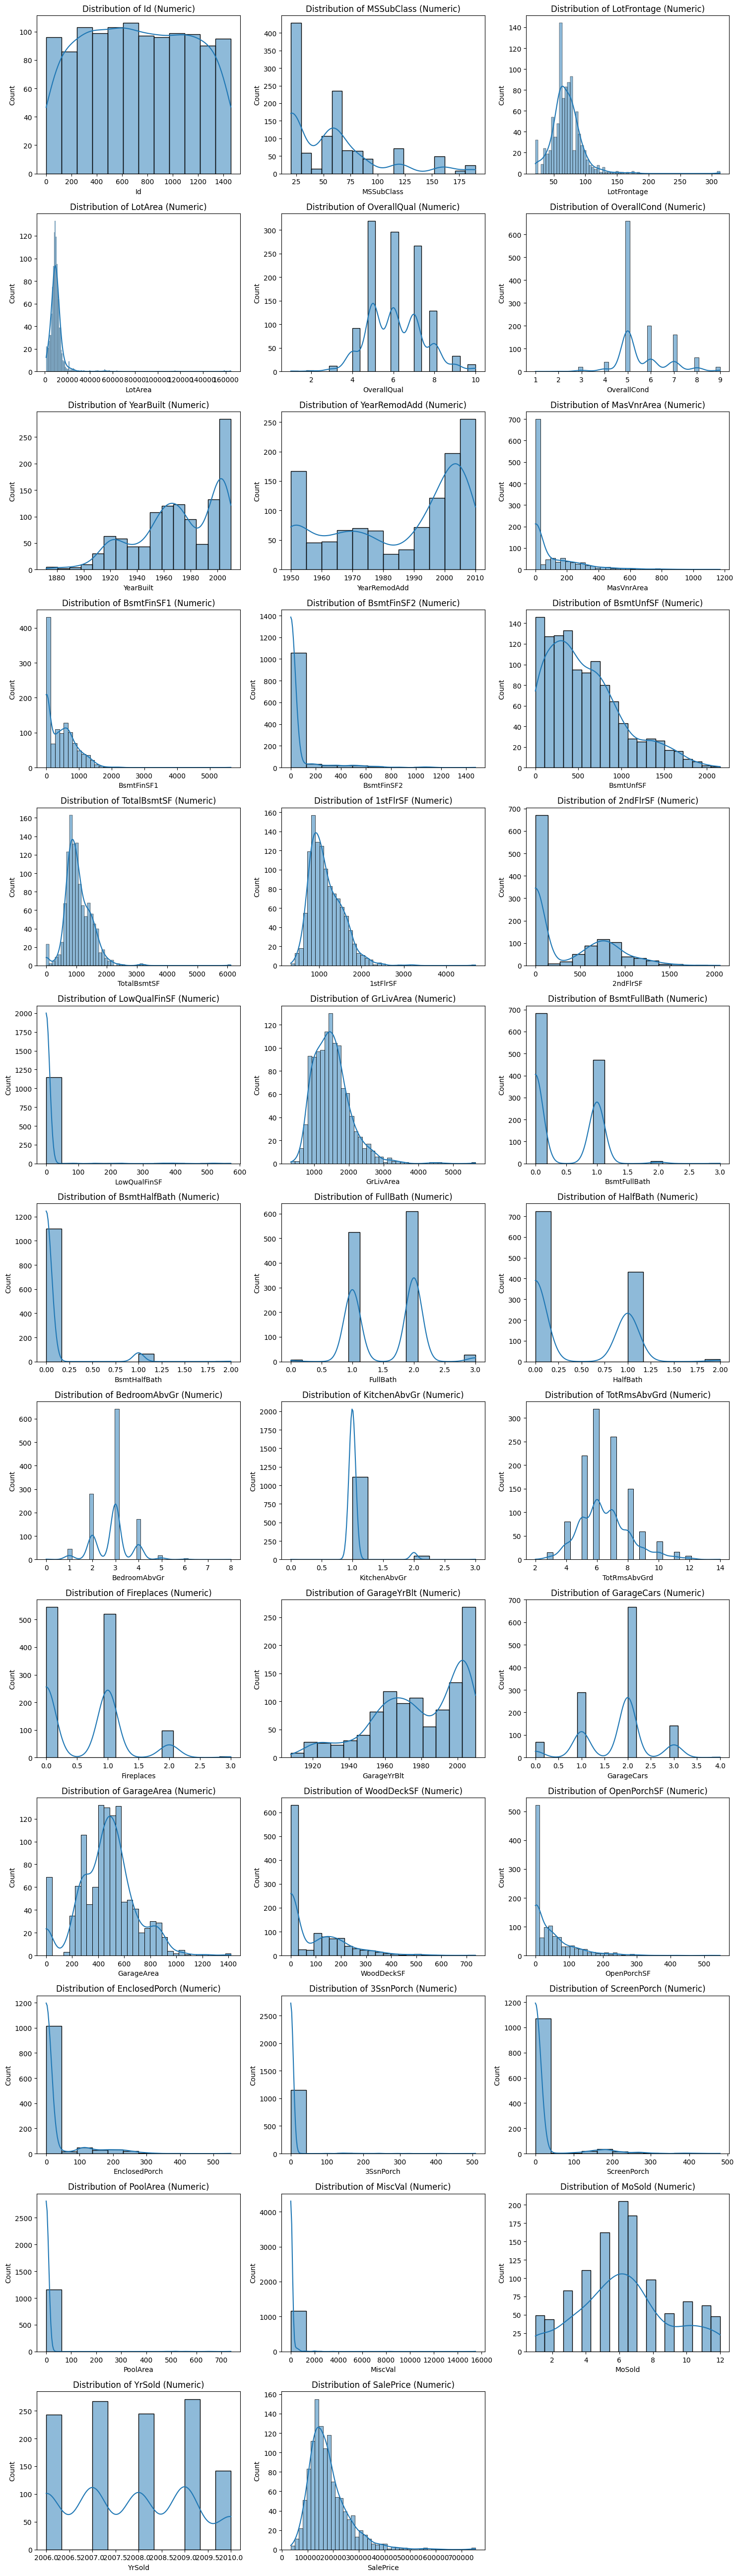

In [10]:
# distribution of numeric features (distplot)
plot_feature_distributions(train_df[numeric_features])

- 스케일 변환 혹은 추가 전처리 필요한 특징(예, `0`값 처리)
  - 석조베니아면적(`MasVnrArea`),
  - 주요 지하실 마감면적(`BsmtFinSF1`), 보조 지하실 마감면적(`BsmtFinSF2`),
  - 2층면적(`2ndFlrSF`), 목재 데크 면적(`WoodDeckSF`),
  - 오픈 현관 면적(`OpenPorchSF`), 밀폐된 현관 면적(`EnclosedPorch`), 3계절용 현관 면적(`3SsnPorch`), 스크린 현관 면적(`ScreenPorch`)
  - 수영장 면적(`PoolArea`),
- 필요시 범주형 특징으로 변환 고려 (예, 정수형이면서 unique_value 숫자가 적은 특징)
  - 지하실 완비 욕실 수(`BsmtFullBath`), 지하실 반 욕실 수(`BsmtHalfBath`), 지상 완비 욕실 수(`FullBath`), 지상 반 욕실 수(`HalfBath`)
  - `kitchenAbvGr`, 벽난로 개수(`Fireplaces`), 차고 크기(주차가능 차량 수)(`GarageCars`),
- 삭제 고려 :
  - 저품질 마감면적(`LowQualFinSF`), 기타기능의 금전적 가치(`MiscVal`)
- 날짜 타입 : 판매연도(`YrSold`)

# 데이터 전처리
---

In [11]:
#중복 데이터 확인
train_df.drop('Id', axis=1)[train_df.drop('Id', axis=1).duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## **결측 데이터 전처리**
___

In [12]:
missing_summary_list = []
print('--- 컬럼별 결측 확인 ---')
for feature in train_df.columns:
  if train_df[feature].isna().sum() > 0:
    missing_cnt = train_df[feature].isna().sum()
    ratio = train_df[feature].isna().sum() / len(train_df[feature]) * 100

    missing_summary_list.append({'feature_name': feature, 'missing_cnt': missing_cnt, 'ratio': np.round(ratio, 2)})

missing_summary_list = pd.DataFrame(missing_summary_list).sort_values('missing_cnt', ascending=False)
display(missing_summary_list)

--- 컬럼별 결측 확인 ---


,feature_name,missing_cnt,ratio
16,PoolQC,1162,99.49
18,MiscFeature,1120,95.89
1,Alley,1098,94.01
17,Fence,941,80.57
2,MasVnrType,694,59.42
10,FireplaceQu,545,46.66
0,LotFrontage,218,18.66
11,GarageType,69,5.91
12,GarageYrBlt,69,5.91
13,GarageFinish,69,5.91


<Axes: >

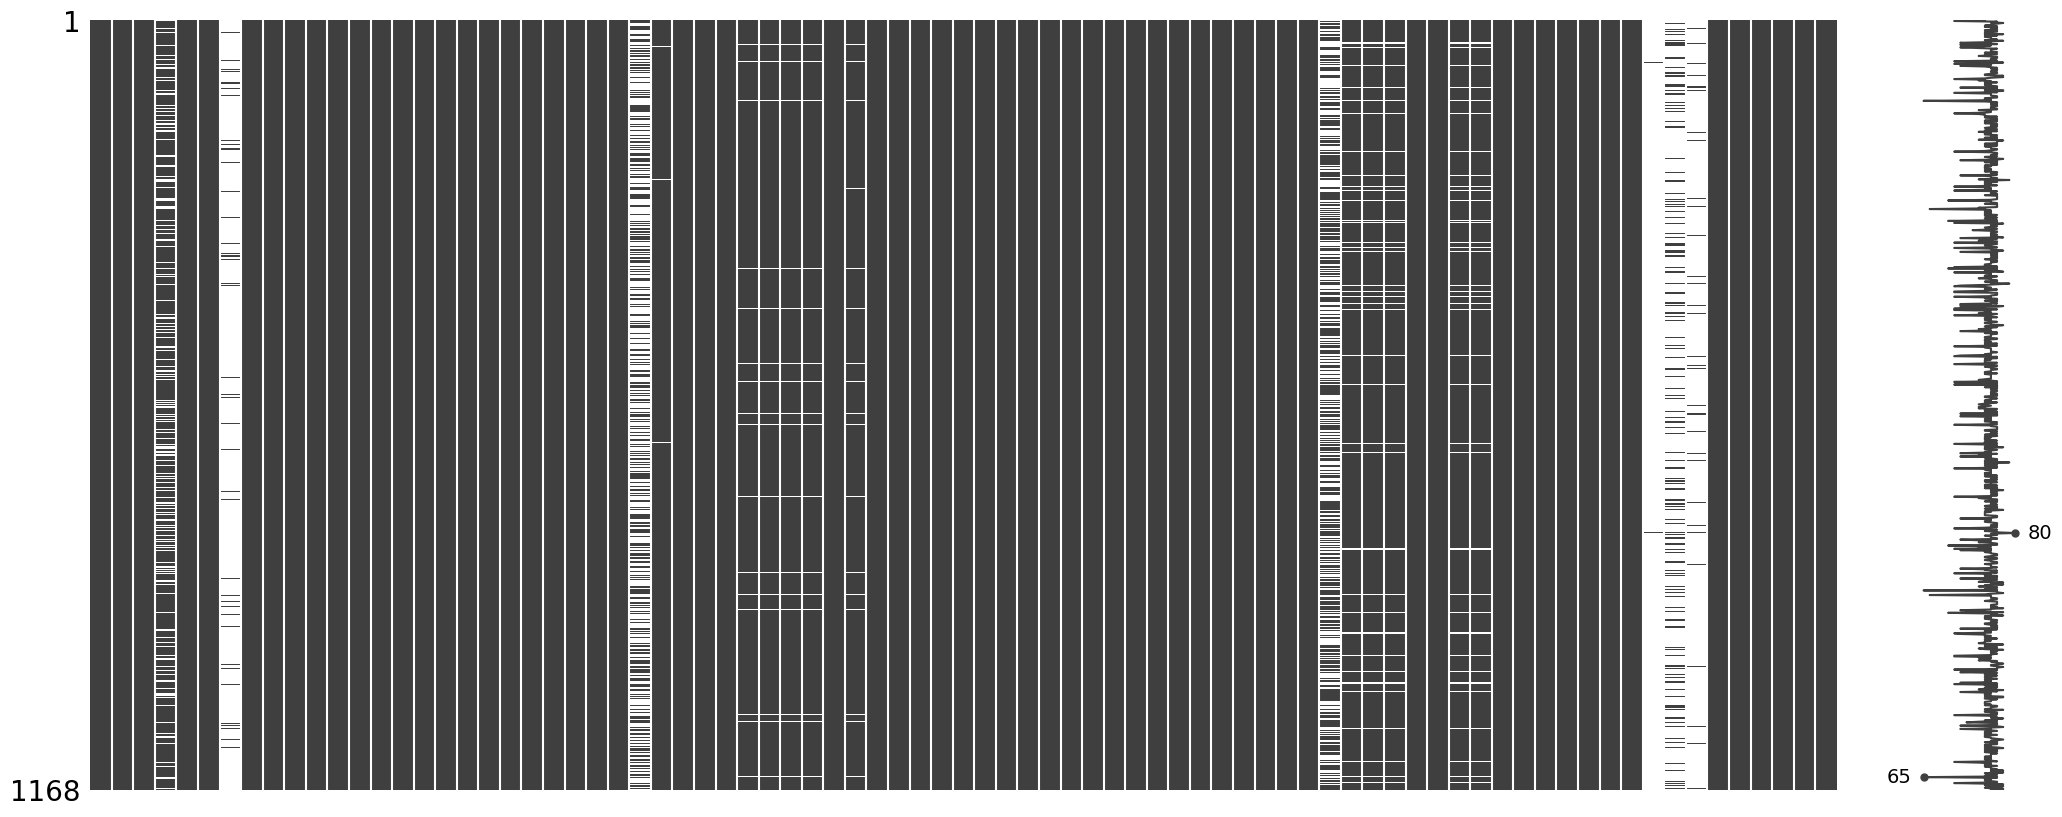

In [13]:
# 결측 데이터 시각화
import missingno as msno
msno.matrix(train_df)

### PoolQC

In [14]:
# 수영장 관련 특징
train_df.columns[train_df.columns.str.contains('Pool')]

Index(['PoolArea', 'PoolQC'], dtype='object')

<Axes: title={'center': 'Distribution of PoolArea  (with missing PooLQC)'}>

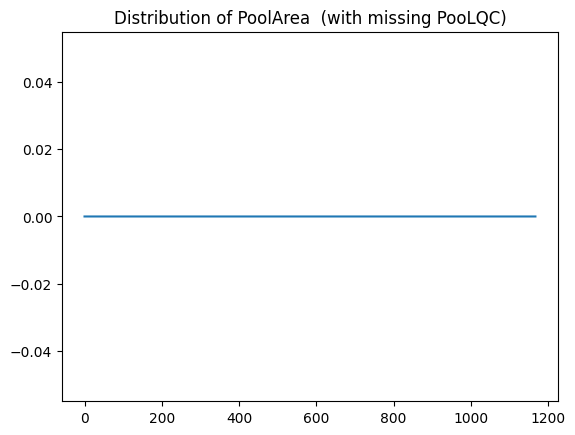

In [15]:
# PooLQC가 결측인 데이터의 PoolArea 분포
train_df.loc[train_df['PoolQC'].isna(), 'PoolArea'].plot(title = 'Distribution of PoolArea  (with missing PooLQC)')

- `PoolQC`가 결측인 1162건(99.49 %)의 데이터에는 `PoolArea`이 0 으로 저장되어 있음
- 두 특징은 학습에서 제외하는 것이 합리적으로 판단됨

### MiscFeature

In [16]:
# 기타기능 관련 데이터
train_df.columns[train_df.columns.str.contains('Misc')]

Index(['MiscFeature', 'MiscVal'], dtype='object')

<Axes: title={'center': 'Distribution of MiscVal  (with missing MiscFeature)'}>

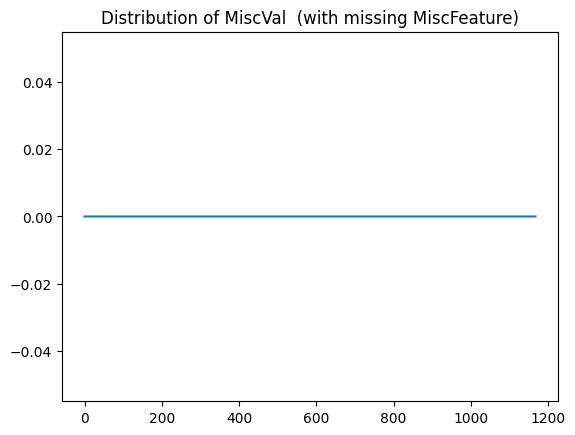

In [17]:
# MiscFeature 결측인 데이터의 MiscVal 분포
train_df.loc[train_df['MiscFeature'].isna(), 'MiscVal'].plot(title = 'Distribution of MiscVal  (with missing MiscFeature)')

- `MiscFeature`가 결측인 1120건(95.89 %)의 데이터에는 `MiscVal` 또한 0 으로 저장되어 있음
- 두 특징은 학습에서 제외하는 것이 합리적으로 판단됨

### Alley

In [18]:
# 도로 접근 방식 관련 데이터
train_df[['Alley', 'Street']].value_counts()

,,count
Alley,Street,
Grvl,Pave,37
Pave,Pave,33


In [19]:
train_df.loc[train_df['Alley'].isna(), 'Street'].value_counts()

,count
Street,
Pave,1093
Grvl,5


In [20]:
train_df['Street'].value_counts()

,count
Street,
Pave,1163
Grvl,5


- `Alley` 특징은 결측이 1098건(94.01%)으로 너무 많기 때문에 분석에 활용하기 어렵다고 판단됨  
- `Street` 특징은 또한 한쪽으로 너무 치우친 데이터이므로 분석에 활용하기 어렵다고 판단됨

### Fence

In [21]:
train_df['Fence'] = train_df['Fence'].fillna('None')
train_df[['Fence']].value_counts()

,count
Fence,
None,941
MnPrv,127
GdWo,47
GdPrv,46
MnWw,7


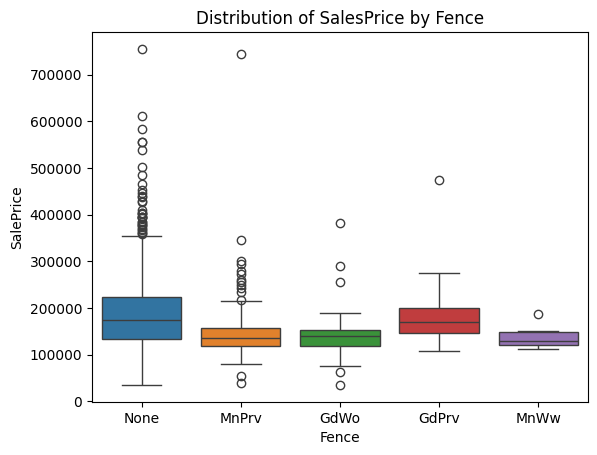

In [22]:
sns.boxplot(data=train_df, x = 'Fence', y='SalePrice', hue='Fence')
plt.title('Distribution of SalesPrice by Fence');

In [23]:
train_df['Fence'] = train_df['Fence'].replace(['MnWw', 'MnPrv'], 'MnPrv+MnWw')

- `Fence`가 결측인 데이터는 941건(80.57%)이지만 결측을 `None`으로 대체한 후 SalesPrice의 분포를 확인하였음  
- Fence 값에 따라 SalesPrice의 분포가 유의미하게 달라지는 것을 확인하여 학습에 활용하기로 결정  
- 하지만 Fence 값 중에서 'MnWw'의 빈도수가 너무 적으므로 , 'MnPrv'와 병합 후 'MnPrv+MnWw'로 변경하였음

### MasVnrType, MasVnrArea

In [24]:
# 석조베니어 관련 특징
train_df.columns[train_df.columns.str.contains('MasVnr')]

Index(['MasVnrType', 'MasVnrArea'], dtype='object')

In [25]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')

train_df[['MasVnrType']].value_counts()

,count
MasVnrType,
None,694
BrkFace,359
Stone,104
BrkCmn,11


- MasVnrType의 결측은 `None`으로 대치하였음
- MasVnrType의 값 중에서 'BrkCmn'의 빈도수가 너무 적어 학습이 어렵다고 판단되어, 'BrkFace'와 함께 'Brk'으로 replace하였음

Text(0.5, 1.05, 'Distribution of MasVnrArea by MasVnrType ')

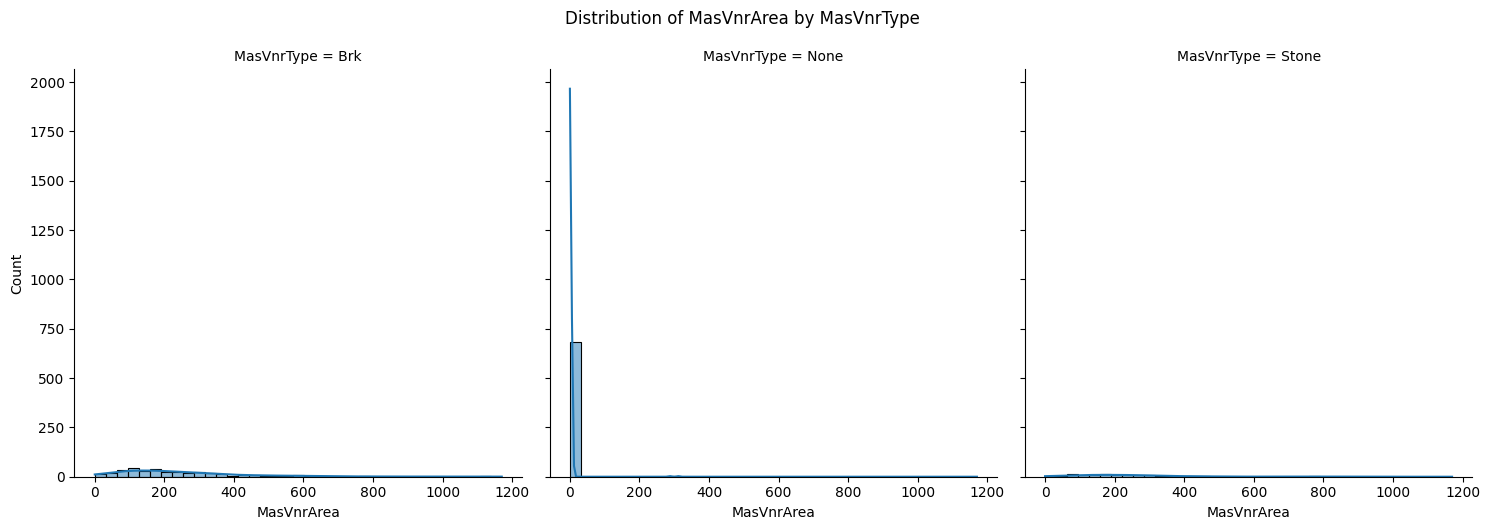

In [26]:
train_df['MasVnrType'] = train_df['MasVnrType'].replace(['BrkFace', 'BrkCmn'], 'Brk')

sns.displot(data=train_df, x='MasVnrArea', col='MasVnrType', kde=True)
plt.suptitle('Distribution of MasVnrArea by MasVnrType ', y=1.05, fontsize=12)

In [27]:
train_df.loc[train_df['MasVnrType'] == 'None', 'MasVnrArea'].value_counts()

,count
MasVnrArea,
0.0,682
1.0,2
288.0,1
312.0,1


In [28]:
train_df.loc[train_df['MasVnrType'] == 'None', 'MasVnrArea'] = 0

- `MasVnrType`가 결측인 데이터는 `None`으로 대치
- 또한 `MasVnrType`이 'None'이지만 `MasVnrArea`가 0이 아닌 데이터를 확인하엿음
  - 이상치로 판단되어 0 으로 대치하였음

### FireplaceQu

In [29]:
train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
train_df['FireplaceQu'].value_counts()

,count
FireplaceQu,
None,545
Gd,314
TA,246
Fa,27
Ex,20
Po,16


In [30]:
# 벽난로 관련 특징
train_df.columns[train_df.columns.str.contains('Fire')]

Index(['Fireplaces', 'FireplaceQu'], dtype='object')

In [31]:
train_df['Fireplaces'].value_counts()

,count
Fireplaces,
0,545
1,520
2,98
3,5


Text(0.5, 1.0, 'Distribution of Fireplaces and FireplaceQu')

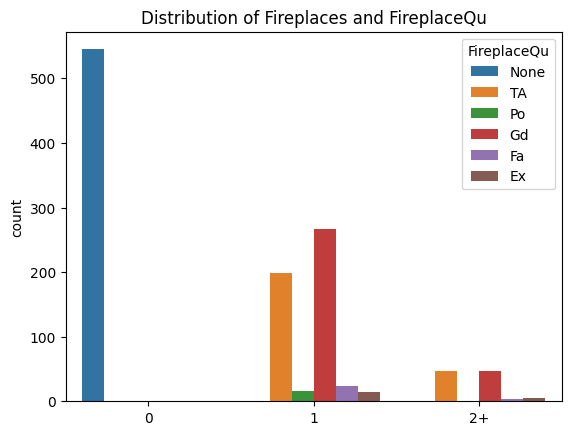

In [32]:
train_df['Fireplaces'] = train_df['Fireplaces'].astype('object').replace([2, 3], '2+')

sns.countplot(train_df, x = 'Fireplaces', hue= 'FireplaceQu').set_xlabel("")
plt.title("Distribution of Fireplaces and FireplaceQu")

- `Fireplaces`가 3인 데이터의 빈도수가 너무 적어서 학습이 어려울 것이라 판단됨
- object 타입으로 변환 후 2와 3을 '2+'로 전처리하였음

### GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [33]:
# 차고 관련 특징
train_df.columns[train_df.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [34]:
train_df.loc[train_df['GarageType'].isna(), train_df.columns[train_df.columns.str.contains('Garage')]]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1,NaN,NaN,NaN,0,0,NaN,NaN
34,NaN,NaN,NaN,0,0,NaN,NaN
35,NaN,NaN,NaN,0,0,NaN,NaN
41,NaN,NaN,NaN,0,0,NaN,NaN
69,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1069,NaN,NaN,NaN,0,0,NaN,NaN
1074,NaN,NaN,NaN,0,0,NaN,NaN
1124,NaN,NaN,NaN,0,0,NaN,NaN
1147,NaN,NaN,NaN,0,0,NaN,NaN


- 차고가 없는 경우(GarageCars=0 or GarageArea =0), `GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond` 모두 결측인 데이터로 식별됨
- 이에 차고 관련 특징 결측은 `None`과 `0` 으로 대치하였음

In [35]:
train_df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = train_df[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)

### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

In [36]:
# 지하실 관련 특징
train_df.columns[train_df.columns.str.contains('Bsmt')]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [37]:
train_df.loc[train_df['TotalBsmtSF'] == 0, train_df.columns[train_df.columns.str.contains('Bsmt')]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
37,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
62,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
66,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
122,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
286,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
318,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
376,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
437,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
521,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
548,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


- 지하실 전체면적(`TotalBsmtSF`)이 0인 데이터는 `BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2` 모두 결측인 데이터로 식별됨
- 이에 결측 데이터가 존재하는 차고 관련 특징을 `None`으로 대치하였음

### LotFrontage

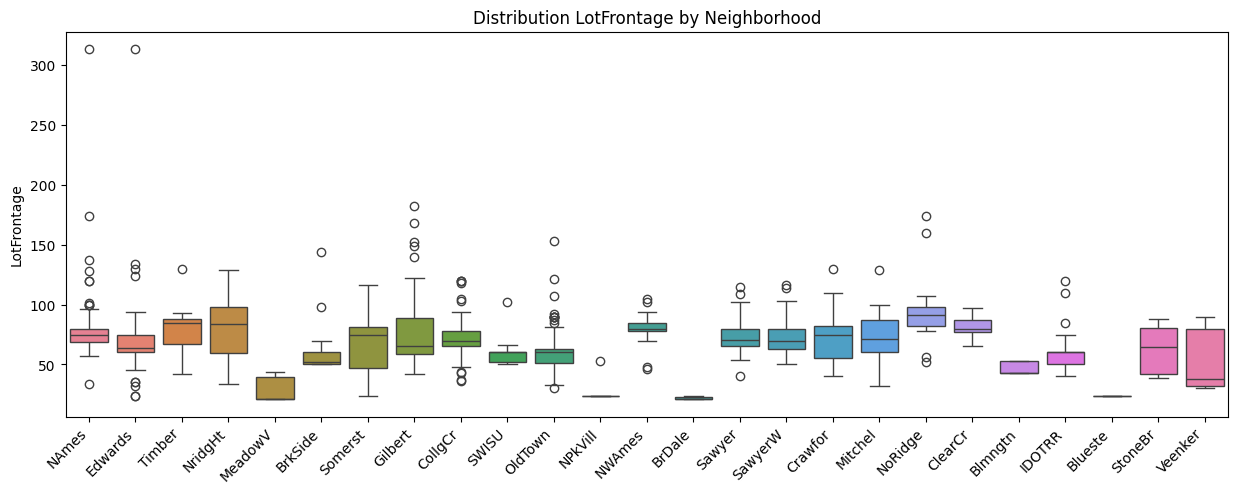

In [38]:
plt.figure(figsize = (15,5))

sns.boxplot(train_df, x = 'Neighborhood', y = 'LotFrontage', hue = 'Neighborhood').set_xlabel("")
plt.xticks(rotation=45, ha='right')

plt.title('Distribution LotFrontage by Neighborhood')
plt.show();

- 일반적으로 같은 지역에 있는 주택들은 토지 크기나 모양이 비슷하기 때문에 Neiborhood 별 mean을 확인하였음
- 그 결과 Neiborhood에 따라 LotFrontage의 분포가 달라짐을 확인하였음
- 이에 LotFrontage에 대한 결측은 Neighborhood별 중앙값을 활용하였음

In [39]:
neighborhood_medians = train_df.groupby('Neighborhood')['LotFrontage'].median()

train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['Neighborhood'].map(neighborhood_medians))

### Electrical

In [40]:
train_df['Electrical'].fillna('None').value_counts()

,count
Electrical,
SBrkr,1066
FuseA,76
FuseF,21
FuseP,3
Mix,1
None,1


- `Electrical`의 결측은 최빈값을 활용하여 대치하였음

In [41]:
train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')

## **범주형 전처리**
___

### 분포가 치우친 특징

Text(0.5, 1.0, 'Distribution of Heating')

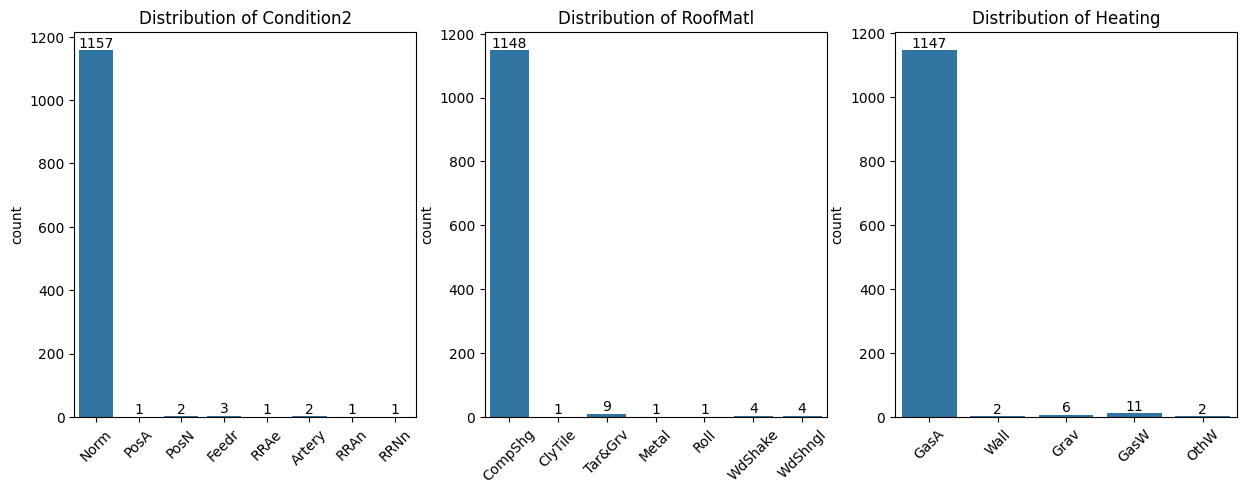

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (15,5))

sns.countplot(train_df, x = 'Condition2', ax = ax1).set_xlabel("")
ax1.bar_label(ax1.containers[0]); ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Distribution of Condition2")

sns.countplot(train_df, x ='RoofMatl', ax = ax2).set_xlabel("")
ax2.bar_label(ax2.containers[0]); ax2.tick_params(axis='x', rotation=45)
ax2.set_title("Distribution of RoofMatl")

sns.countplot(train_df, x = 'Heating', ax = ax3).set_xlabel("")
ax3.bar_label(ax3.containers[0]); ax3.tick_params(axis='x', rotation=45)
ax3.set_title("Distribution of Heating")

- `Condition2`, `RoofMatl`, `Heating`은 분포가 한쪽으로 너무 치우쳐져 있어 원활한 학습이 어려워보임
- 이 특징들은 학습에서 제외하였음

### 희귀 범주 통합 전처리
- EDA 중 빈도수가 20 이하인 값을 가지는 희귀 범주를 다수 확인하였음
- 과적합 방지를 위해 추가로 희귀 범주를 통합하는 전처리를 수행하였음
  - case1. 빈도수가 임계값 미만인 범주가 2개 이상일 경우 --> 'Rare'로 통합
  - case2. 빈도수가 임계값 미만인 범주가 1개일 경우 --> 그 다음으로 빈도수가 낮은 범주로 이름을 변경하여 통합

In [43]:
def group_rare_categories(df, categorical_features, threshold, verbose = True):
    df_copy = df.copy()

    for col in categorical_features:
      if col in df_copy.columns and df_copy[col].dtype == 'object':
        counts = df_copy[col].value_counts()
        rare_categories = counts[counts < threshold].index

        if not rare_categories.empty & len(counts) >= 4:
          if len(rare_categories) >= 2:
            df_copy[col] = df_copy[col].replace(rare_categories, 'Rare')
            if verbose:
              print(f"\'{col}'의 빈도수 {threshold} 미만 범주들을 'Rare'로 통합했습니다.")

          elif len(rare_categories) == 1:
            most_frequent_but_rare_category = counts.index.drop(rare_categories)[-1]
            rare_category_name = rare_categories[0]

            new_name = f"{most_frequent_but_rare_category}+{rare_category_name}"
            df_copy[col] = df_copy[col].replace(rare_category_name, new_name)
            df_copy[col] = df_copy[col].replace(most_frequent_but_rare_category, new_name)
            if verbose:
              print(f"\n'{col}'의 '{rare_category_name}' 범주를 '{most_frequent_but_rare_category}'와 통합하여 '{new_name}'로 변경했습니다.")

    return df_copy

In [44]:
numeric_features, categorical_features, boolean_features = categorize_features(train_df)
group_rare_categories(train_df, categorical_features, 20)

'MSZoning'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.

'Street'의 'Grvl' 범주를 'Pave'와 통합하여 'Pave+Grvl'로 변경했습니다.

'LotShape'의 'IR3' 범주를 'IR2'와 통합하여 'IR2+IR3'로 변경했습니다.

'Utilities'의 'NoSeWa' 범주를 'AllPub'와 통합하여 'AllPub+NoSeWa'로 변경했습니다.

'LotConfig'의 'FR3' 범주를 'FR2'와 통합하여 'FR2+FR3'로 변경했습니다.

'LandSlope'의 'Sev' 범주를 'Mod'와 통합하여 'Mod+Sev'로 변경했습니다.
'Neighborhood'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Condition1'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Condition2'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'HouseStyle'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'RoofStyle'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'RoofMatl'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Exterior1st'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Exterior2nd'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.

'ExterQual'의 'Fa' 범주를 'Ex'와 통합하여 'Ex+Fa'로 변경했습니다.
'ExterCond'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Foundation'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.

'BsmtCond'의 'Po' 범주를 'Fa'와 통합하여 'Fa+Po'로 변경했습니다.
'BsmtFinType2'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.
'Heating'의 빈도수 20 미만 범주들을 'Rare'로 통합했습니다.

'HeatingQC'의 'Po' 범주를 'Fa'와 통

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,75.0,7390,Pave+Grvl,NaN,IR1,Lvl,AllPub+NoSeWa,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,Brk,151.0,TA,TA,CBlock,TA,TA,No,ALQ,902,Unf,0,196,1098,GasA,TA,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,TA,6,Typ,0,None,Attchd,1955.0,Unf,1,260,TA,TA,Y,0,0,0,0,0,0,NaN,None,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave+Grvl,NaN,Reg,Lvl,AllPub+NoSeWa,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,5,5,1987,1988,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,Gd,Gd,GLQ,1200,Unf,0,0,1200,GasA,TA,Y,SBrkr,1200,0,0,1200,3,0,3,0,3,1,TA,5,Typ,0,None,None,0.0,None,0,0,None,None,Y,120,0,0,0,0,0,NaN,None,NaN,0,3,2009,WD,Rare,179000
2,696,20,RL,54.0,13811,Pave+Grvl,NaN,IR1,Lvl,AllPub+NoSeWa,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,6,1987,1987,Gable,CompShg,HdBoard,HdBoard,Brk,72.0,TA,TA,CBlock,Gd,Gd,No,GLQ,980,LwQ,40,92,1112,GasA,Gd,Y,SBrkr,1137,0,0,1137,1,0,2,0,2,1,Gd,5,Typ,1,TA,Attchd,1987.0,Unf,2,551,TA,TA,Y,125,0,0,0,0,0,NaN,None,NaN,0,7,2006,WD,Normal,176000
3,239,20,RL,93.0,12030,Pave+Grvl,NaN,Reg,Lvl,AllPub+NoSeWa,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,Brk,254.0,Ex+Fa,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,0,0,2,0,3,1,Gd,7,Typ,0,None,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,NaN,None,NaN,0,12,2007,New,Partial,318000
4,891,50,RL,60.0,8064,Pave+Grvl,NaN,Reg,Lvl,AllPub+NoSeWa,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,5,7,1949,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Unf,0,Unf,0,672,672,GasA,Ex,Y,SBrkr,672,252,0,924,0,0,1,0,3,1,TA,6,Typ,1,Ex+Po,Detchd,2003.0,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv+MnWw,Shed,2000,7,2007,WD,Normal,122900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,184,50,RM,63.0,11426,Pave+Grvl,NaN,Reg,Lvl,AllPub+NoSeWa,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1362,1362,GasA,Ex,Y,SBrkr,1362,720,0,2082,0,0,2,1,3,1,Gd,6,Rare,0,None,Detchd,2003.0,Unf,2,484,TA,TA,N,280,238,0,0,0,0,NaN,None,NaN,0,6,2008,WD,Normal,200000
1164,447,20,RL,137.0,16492,Pave+Grvl,NaN,IR1,Lvl,AllPub+NoSeWa,Corner,Gtl,NAmes,Rare,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247,Rec,713,557,1517,GasA,Ex,Y,SBrkr,1888,0,0,1888,0,0,2,1,2,1,Gd,6,Rare,1,Gd,Attchd,1966.0,Fin,2,578,TA,TA,Y,0,0,0,0,0,0,NaN,None,NaN,0,6,2010,WD,Normal,190000
1165,540,20,RL,70.0,11423,Pave+Grvl,NaN,Reg,Lvl,AllPub+NoSeWa,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Brk,479.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1358,Unf,0,223,1581,GasA,Ex,Y,SBrkr,1601,0,0,1601,1,0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,670,TA,TA,Y,180,0,0,0,0,0,NaN,MnPrv+MnWw,Shed,2000,5,2010,WD,Normal,272000
1166,641,120,RL,62.0,12677,Pave+Grvl,NaN,IR1,Lvl,AllPub+NoSeWa,Inside,G

## **수치형 특징 전처리**
___

### 로그 변환
- 한 쪽으로 치우친 분포를 가진 특징에 대해 로그 변환을 수행하였음

In [45]:
def plotting_log_transformation(df, feature):
  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (8,4), sharey = True)

  sns.histplot(df[feature], kde=True, ax = ax1)
  sns.histplot(np.log1p(df[feature]), kde = True, ax = ax2)
  ax2.set_xlabel(f'log1p({feature})')

  plt.suptitle(f"Comparison of Log Transformation: {feature}")
  plt.tight_layout()
  plt.show()

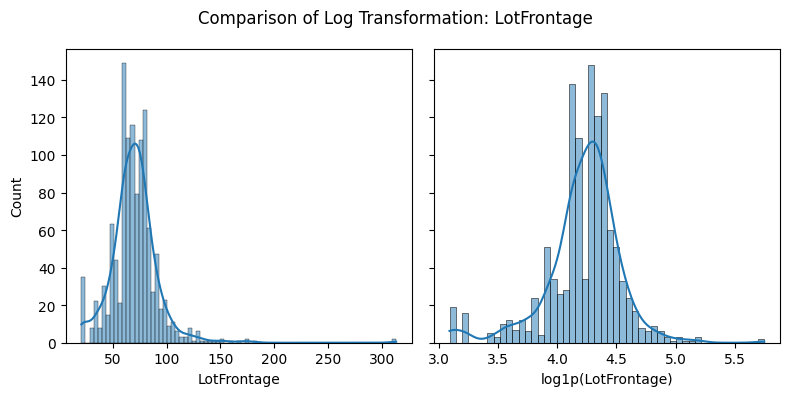

In [46]:
plotting_log_transformation(train_df, 'LotFrontage')

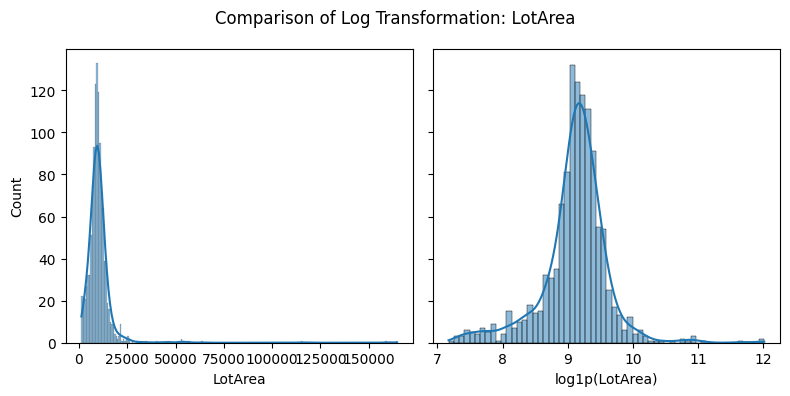

In [47]:
plotting_log_transformation(train_df, 'LotArea')

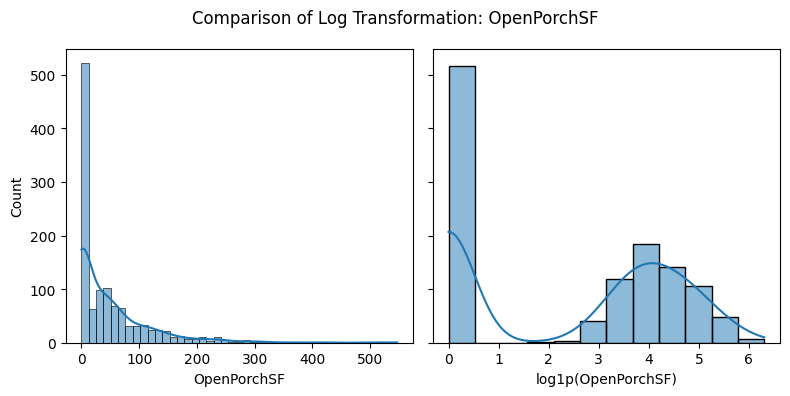

In [48]:
plotting_log_transformation(train_df, 'OpenPorchSF')

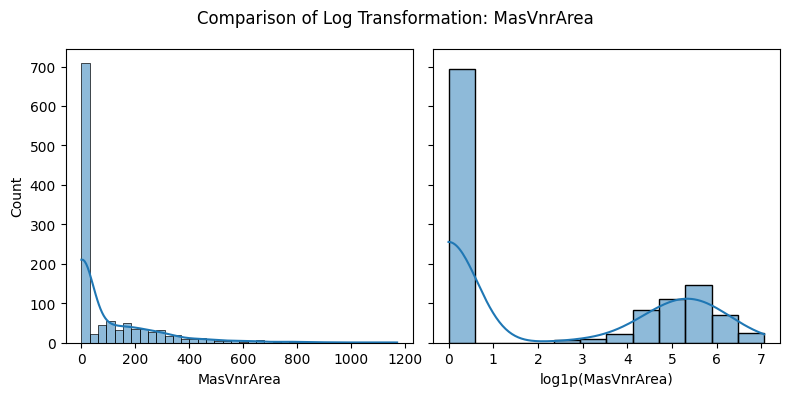

In [49]:
plotting_log_transformation(train_df, 'MasVnrArea')

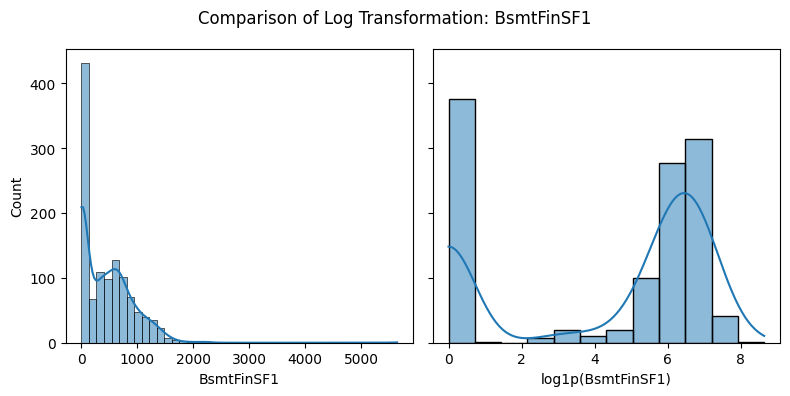

In [50]:
plotting_log_transformation(train_df, 'BsmtFinSF1')

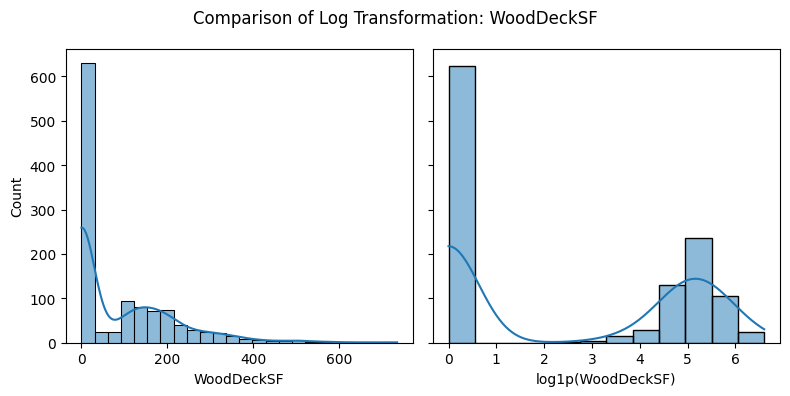

In [51]:
plotting_log_transformation(train_df, 'WoodDeckSF')

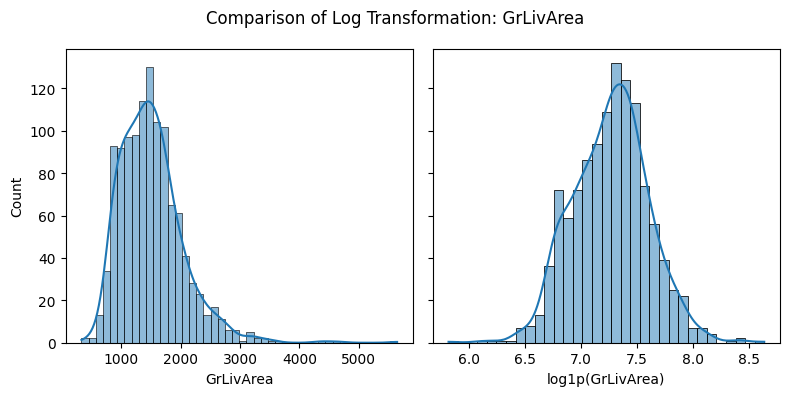

In [52]:
plotting_log_transformation(train_df, 'GrLivArea')

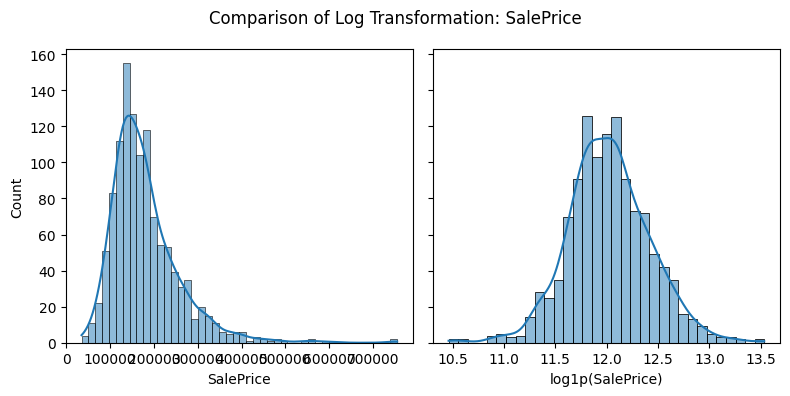

In [53]:
plotting_log_transformation(train_df, 'SalePrice')

### 데이터 타입 변환

Text(0.5, 1.0, 'Distribution of MSSubClass')

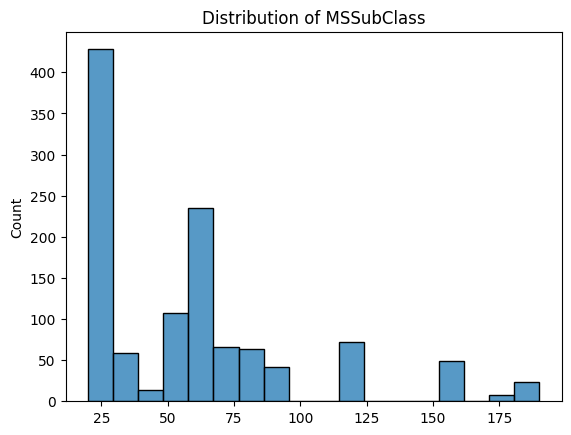

In [54]:
sns.histplot(train_df['MSSubClass']).set_xlabel("")
plt.title("Distribution of MSSubClass")

- `MSSubClass`는 주택 유형을 의미하는 특징으로 의미에 맞게 범주형으로  변환하였음

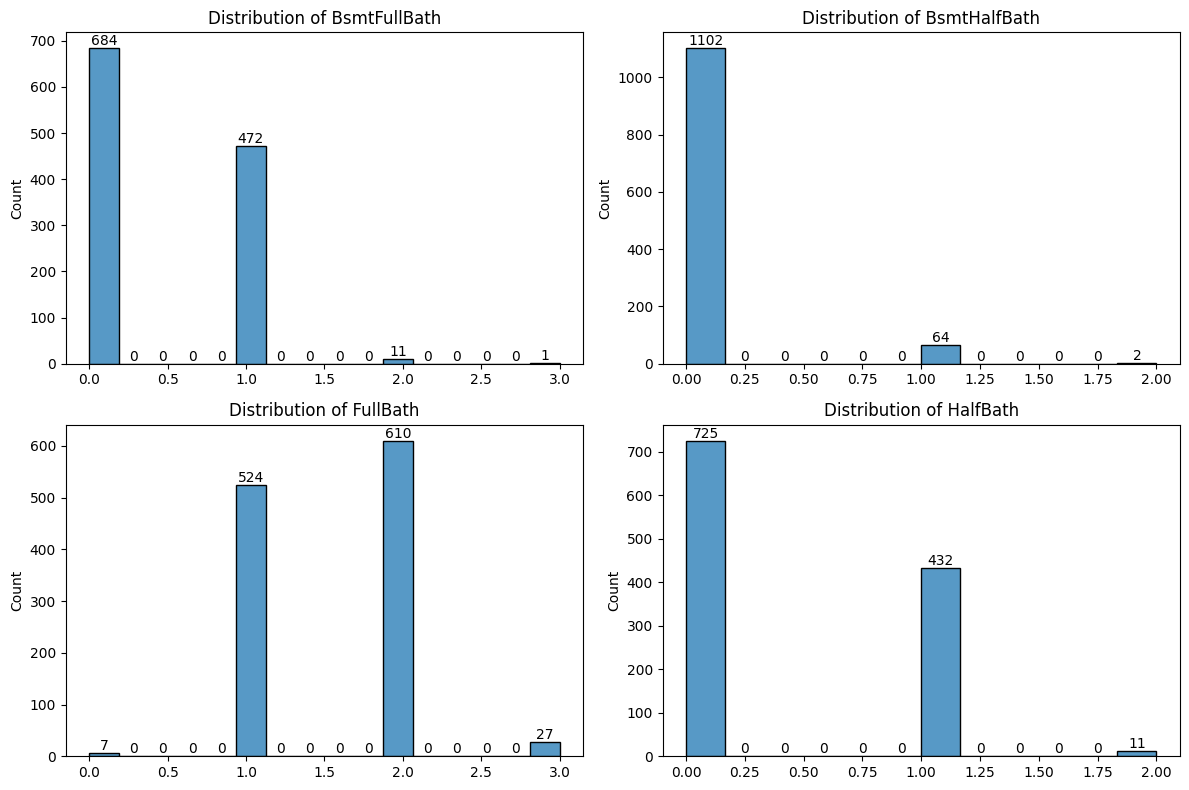

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize = (12,8))

sns.histplot(train_df['BsmtFullBath'], ax = ax1[0]).set_xlabel("")
ax1[0].bar_label(ax1[0].containers[0])
ax1[0].set_title("Distribution of BsmtFullBath")

sns.histplot(train_df['BsmtHalfBath'], ax = ax1[1]).set_xlabel("")
ax1[1].bar_label(ax1[1].containers[0])
ax1[1].set_title("Distribution of BsmtHalfBath")

sns.histplot(train_df['FullBath'], ax = ax2[0]).set_xlabel("")
ax2[0].bar_label(ax2[0].containers[0])
ax2[0].set_title("Distribution of FullBath")

sns.histplot(train_df['HalfBath'], ax = ax2[1]).set_xlabel("")
ax2[1].bar_label(ax2[1].containers[0])
ax2[1].set_title("Distribution of HalfBath")

plt.tight_layout()

- `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`는 범주형 특징으로 변환

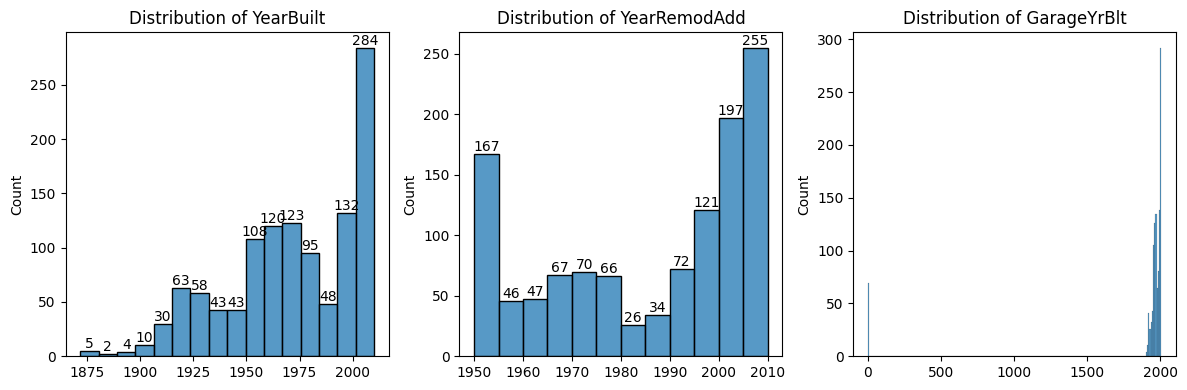

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (12,4))

sns.histplot(train_df['YearBuilt'], ax = ax1).set_xlabel("")
ax1.bar_label(ax1.containers[0])
ax1.set_title("Distribution of YearBuilt")

sns.histplot(train_df['YearRemodAdd'], ax = ax2).set_xlabel("")
ax2.bar_label(ax2.containers[0])
ax2.set_title("Distribution of YearRemodAdd")

sns.histplot(train_df['GarageYrBlt'], ax = ax3).set_xlabel("")
ax3.set_title("Distribution of GarageYrBlt")

plt.tight_layout()

- 최초 건축연도(`YearBuilt`), 리모델링/개조 연도(`YearRemodAdd`), 차고 건축 연도(`GarageYrBlt`)는 추후 필요 시 전처리

### 불필요한 특징(정보량 부족)

Text(0.5, 1.0, 'Distribution of EnclosedPorch')

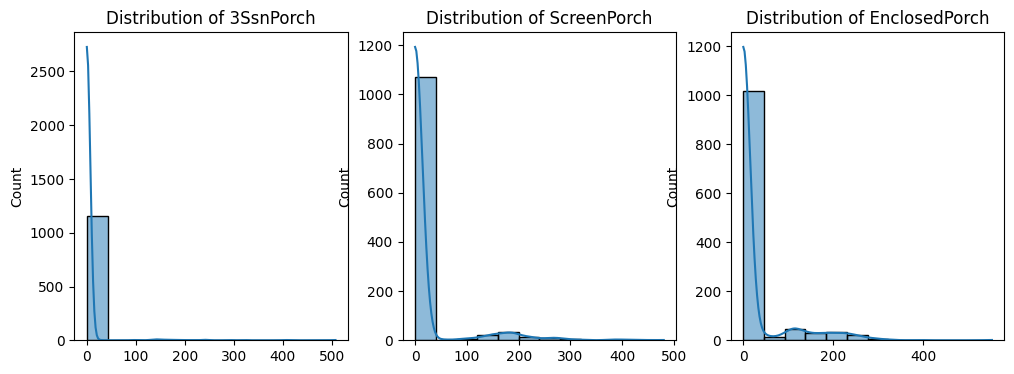

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (12,4))

sns.histplot(train_df['3SsnPorch'], kde=True, ax = ax1).set_xlabel("")
ax1.set_title("Distribution of 3SsnPorch")

sns.histplot(train_df['ScreenPorch'], kde=True, ax = ax2).set_xlabel("")
ax2.set_title("Distribution of ScreenPorch")

sns.histplot(train_df['EnclosedPorch'], kde=True, ax = ax3).set_xlabel("")
ax3.set_title("Distribution of EnclosedPorch")

Text(0.5, 1.0, 'Distribution of LowQualFinSF')

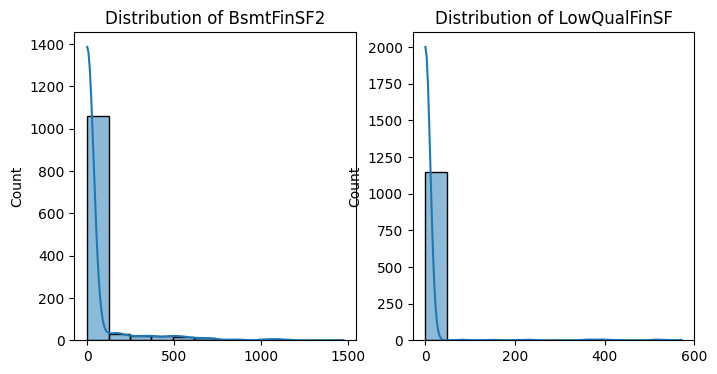

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

sns.histplot(train_df['BsmtFinSF2'], kde=True, ax = ax1).set_xlabel("")
ax1.set_title("Distribution of BsmtFinSF2")

sns.histplot(train_df['LowQualFinSF'], kde=True, ax = ax2).set_xlabel("")
ax2.set_title("Distribution of LowQualFinSF")

- 정보량 부족으로 학습에 유의미해보이지 않음
  - `3SsnPorch`, `ScreenPorch`, `EnclosedPorch` 그리고 `BsmtFinSF2`,`LowQualFinSF` 는 학습에서 제외하였음

**상관분석**

<Axes: >

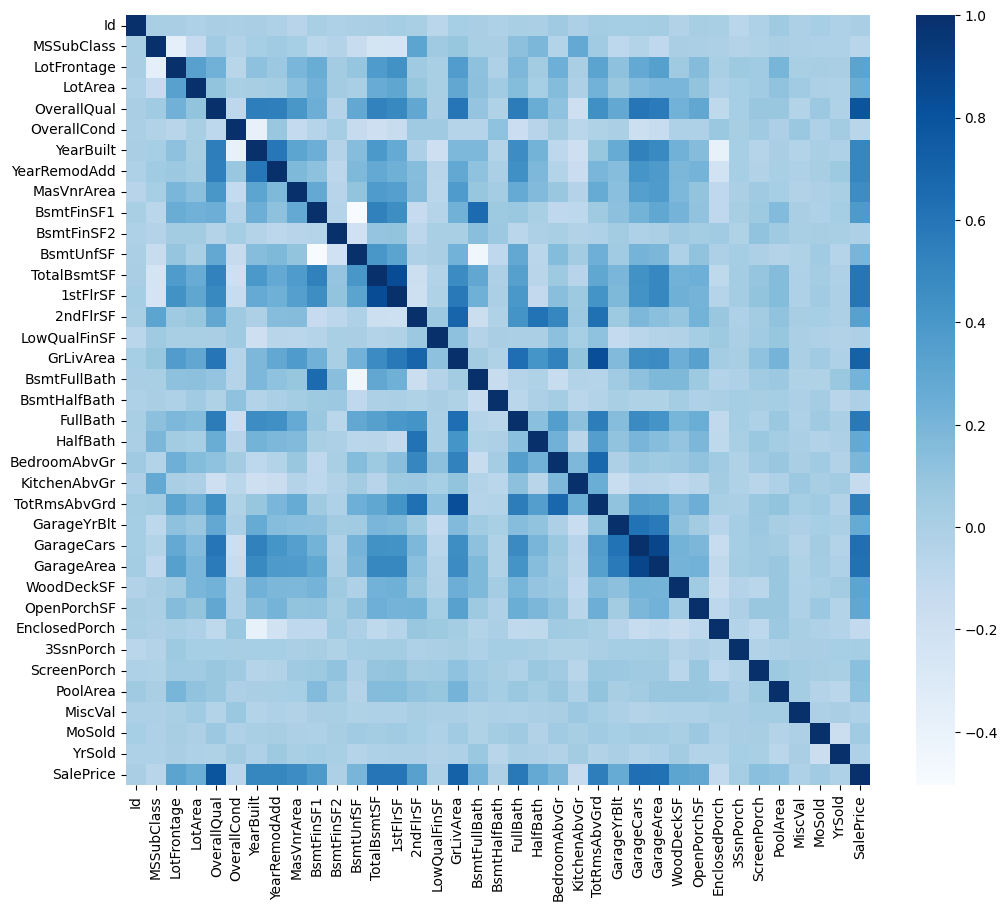

In [59]:
plt.figure(figsize = (12,10))

sns.heatmap(train_df.select_dtypes('number').corr(), cmap='Blues')

In [60]:
def corr_filter(df, val = 0.5):
    corr_df = df.select_dtypes('number').corr().unstack().reset_index()
    corr_df.columns = ['feat_1', 'feat_2', 'corr_value']
    corr_df = corr_df[corr_df.feat_1 > corr_df.feat_2]
    return corr_df[(corr_df.corr_value >= val) | (corr_df.corr_value <= -val)].sort_values('corr_value', ascending=False)

corr_filter(train_df, 0.5)

,feat_1,feat_2,corr_value
951,GarageCars,GarageArea,0.882274
457,TotalBsmtSF,1stFlrSF,0.837397
867,TotRmsAbvGrd,GrLivArea,0.828978
1336,SalePrice,OverallQual,0.785111
1348,SalePrice,GrLivArea,0.710178
606,GrLivArea,2ndFlrSF,0.689503
872,TotRmsAbvGrd,BedroomAbvGr,0.677454
638,BsmtFullBath,BsmtFinSF1,0.654395
611,GrLivArea,FullBath,0.636906
1357,SalePrice,GarageCars,0.632622


In [61]:
train_df.select_dtypes('number').corr()['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.785111
GrLivArea,0.710178
GarageCars,0.632622
GarageArea,0.618311
1stFlrSF,0.597729
TotalBsmtSF,0.595882
FullBath,0.577860
TotRmsAbvGrd,0.548795
YearRemodAdd,0.504817


- 상관관계 분석 후 강한 상관관계를 가진 특징들이 다수 확인되었음
- 이후 분석에 활용할 예측 모델이 상관관계에 비교적 강건한 모델로 알려진 Lasso, Ridge 그리고 Random Forest, LightGBM, XGBoost 등이기 때문에 우선 진행 후 필요시 처리하고자 함

# 모델 설정 및 학습
---

**train_test_split**

In [62]:
def preprocessing(df):
  df_copy = df.copy()

  # --- 결측 데이터 처리 ---
  df_copy = df_copy.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Street'], axis=1)

  df_copy['Fence'] = df_copy['Fence'].fillna('None')
  df_copy['Fence'] = df_copy['Fence'].replace(['MnWw', 'MnPrv'], 'Minimum')

  # 석조베니어 관련 특징
  df_copy['MasVnrType'] = df_copy['MasVnrType'].fillna('None')
  df_copy['MasVnrType'] = df_copy['MasVnrType'].replace(['BrkFace', 'BrkCmn'], 'Brk')
  df_copy.loc[df_copy['MasVnrType'] == 'None', 'MasVnrArea'] = 0

  # 벽난로 관련 특징
  df_copy['FireplaceQu'] = df_copy['FireplaceQu'].fillna('None')
  df_copy['Fireplaces'] = df_copy['Fireplaces'].astype('object').replace([2, 3], '2+').map(lambda x: str(x))

  # 차고 관련 특징
  df_copy[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = df_copy[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('None')
  df_copy['GarageYrBlt'] = df_copy['GarageYrBlt'].fillna(0)

  # 지하실 관련 특징
  df_copy[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = df_copy[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('None')

  neighborhood_medians = df_copy.groupby('Neighborhood')['LotFrontage'].median()
  df_copy['LotFrontage'] = df_copy['LotFrontage'].fillna(df_copy['Neighborhood'].map(neighborhood_medians))
  df_copy['Electrical'] = df_copy['Electrical'].fillna('SBrkr')
  df_copy['Electrical'] = df_copy['Electrical'].replace(['FuseF', 'FuseP', 'Mix'], "FuseF+FuseP+Mix")



  # --- 추가 파생 특징 (선검증 후정리)
  df_copy['TotalBath'] = df_copy['FullBath'] + df_copy['HalfBath'] + df_copy['BsmtFullBath'] + df_copy['BsmtHalfBath']
  df_copy['TotalPorchSF'] = df_copy['3SsnPorch'] + df_copy['ScreenPorch'] + df_copy['EnclosedPorch']
  df_copy['TotalHouseSF'] = df_copy['TotalBsmtSF'] + df_copy['1stFlrSF'] + df_copy['2ndFlrSF']
  df_copy['HouseAge'] = df_copy['YrSold'] - df_copy['YearBuilt']
  df_copy['Remodelled'] = (df_copy['YearRemodAdd'] != df_copy['YearBuilt']).astype(int)

  # --- 수치형 특징 전처리 ---
  # log 변환
  df_copy['LotFrontage'] = np.log1p(df_copy['LotFrontage'])
  df_copy['LotArea'] = np.log1p(df_copy['LotArea'])
  df_copy['OpenPorchSF'] = np.log1p(df_copy['OpenPorchSF'])
  df_copy['TotalHouseSF'] = np.log1p(df_copy['TotalHouseSF'])
  df_copy['MasVnrArea'] = np.log1p(df_copy['MasVnrArea'])
  df_copy['BsmtFinSF1'] = np.log1p(df_copy['BsmtFinSF1'])
  df_copy['WoodDeckSF'] = np.log1p(df_copy['WoodDeckSF'])
  df_copy['GrLivArea'] = np.log1p(df_copy['GrLivArea'])

  df_copy = df_copy.rename(columns={'LotFrontage': 'LotFrontage_log', 'LotArea': 'LotArea_log', 'OpenPorchSF': 'OpenPorchSF_log',
                                    'MasVnrArea': 'MasVnrArea_log', 'BsmtFinSF1': 'BsmtFinSF1_log', 'TotalHouseSF': 'TotalHouseSF_log',
                                    'WoodDeckSF': 'WoodDeckSF_log', 'GrLivArea': 'GrLivArea_log'})

  # int -> object 변환
  df_copy['MSSubClass'] = df_copy['MSSubClass'].map(lambda x: str(x))
  df_copy['BsmtFullBath'] = df_copy['BsmtFullBath'].replace([1,2,3], "1+").map(lambda x: str(x))
  df_copy['BsmtHalfBath'] = df_copy['BsmtHalfBath'].replace([1,2], "1+").map(lambda x: str(x))
  df_copy['FullBath'] = df_copy['FullBath'].replace([2,3], "2+").map(lambda x: str(x))
  df_copy['HalfBath'] = df_copy['HalfBath'].replace([1,2], "1+").map(lambda x: str(x))
  df_copy['MoSold'] = df_copy['MoSold'].map(lambda x: str(x))
  df_copy['YrSold'] = df_copy['YrSold'].map(lambda x: str(x))

  # 컬럼 삭제
  df_copy = df_copy.drop(['3SsnPorch', 'ScreenPorch', 'EnclosedPorch', 'BsmtFinSF2', 'LowQualFinSF'], axis=1)

  # --- 범주형 특징 전처리 ---
  df_copy = df_copy.drop(['Condition2', 'RoofMatl',  'Heating', 'Utilities'], axis=1)

  numeric_features, categorical_features, boolean_features = categorize_features(df_copy)
  df_copy = group_rare_categories(df_copy, categorical_features, 20, verbose=False)
  df_copy['CentralAir'] = df_copy['CentralAir'].map({'Y': 1, 'N': 0})
  return df_copy

In [63]:
from sklearn.model_selection import train_test_split
train_df = pd.read_csv(modu_ds_5_house_prices_prediction_path + '/train.csv')
train_df_prep = preprocessing(train_df)

X = train_df_prep.drop(["Id", "SalePrice"], axis=1)
y = np.log1p(train_df["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

파이프라인 생성

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

numeric_features, categorical_features, boolean_features = categorize_features(X)
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

numeric_features_log = [feature for feature in numeric_features if 'log' in feature]
numeric_features = [feature for feature in numeric_features if 'log' not in feature]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features)
    ],
    remainder='passthrough'
)

models = {
    'Ridge': Ridge(max_iter = 1000, random_state=42),
    'Lasso': Lasso(max_iter = 1000, random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'LightGBM': LGBMRegressor(random_state=42),
    'XGBoost' : XGBRegressor(random_state=42)
}

pipelines = {}
for name, model in models.items():
  pipelines[name] = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', model)
  ])

poly_lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

pipelines['Polynomial LR'] = poly_lr_pipeline

results = {}

for name, pipeline in pipelines.items():
  print(f"--- {name} 모델 학습 시작 ---")
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  results[name] = {'RMSE': rmse, 'R2': r2}
  print(f"RMSE: {rmse:.4f}\nR2: {r2:.4f}\n")

print("--- 최종 성능 비교 ---")
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
display(results_df)

--- Ridge 모델 학습 시작 ---
RMSE: 0.1216
R2: 0.8903

--- Lasso 모델 학습 시작 ---
RMSE: 0.3735
R2: -0.0340

--- Random Forest 모델 학습 시작 ---
RMSE: 0.1290
R2: 0.8766

--- LightGBM 모델 학습 시작 ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3336
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 220
[LightGBM] [Info] Start training from score 12.007004
RMSE: 0.1275
R2: 0.8796

--- XGBoost 모델 학습 시작 ---
RMSE: 0.1401
R2: 0.8546

--- Polynomial LR 모델 학습 시작 ---
RMSE: 0.1389
R2: 0.8570

--- 최종 성능 비교 ---


,RMSE,R2
Ridge,0.121635,0.890350
LightGBM,0.127457,0.879601
Random Forest,0.129040,0.876592
Polynomial LR,0.138911,0.856990
XGBoost,0.140062,0.854610
Lasso,0.373514,-0.033970


# Hyperparameter tuning
___

In [65]:
from sklearn.model_selection import KFold, cross_val_score
import optuna

def objective_lgbm(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'verbose': -1
    }

    model = LGBMRegressor(random_state=42, **param)
    lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', model)])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        lgbm_pipeline.fit(X_train_fold, y_train_fold)
        y_pred = lgbm_pipeline.predict(X_val_fold)
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))

    return np.mean(rmse_scores)

def objective_xgb(trial):
    param = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000, step=100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_loguniform('gamma', 1e-3, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBRegressor(**param)
    xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', model)])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        xgb_pipeline.fit(X_train_fold, y_train_fold)
        y_pred = xgb_pipeline.predict(X_val_fold)
        rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))

    return np.mean(rmse_scores)

def ridge_objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e2)

    model = Ridge(alpha=alpha, random_state=42)
    ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('regressor', model)])

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    oof_preds = np.zeros(len(X_train))

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        ridge_pipeline.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = ridge_pipeline.predict(X_val_fold)

    rmse = np.sqrt(mean_squared_error(y_train, oof_preds))
    return rmse

In [66]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

Optuna로 모델 튜닝 실행
print("--- LightGBM 하이퍼파라미터 튜닝 시작 (Optuna) ---")
lgbm_study = optuna.create_study(direction='minimize')
lgbm_study.optimize(objective_lgbm, n_trials=50)
best_lgbm_params = lgbm_study.best_params
best_lgbm = LGBMRegressor(**best_lgbm_params)
print(f"최적의 LightGBM 파라미터: {best_lgbm_params}")

print("\n--- XGBoost 하이퍼파라미터 튜닝 시작 (Optuna) ---")
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(objective_xgb, n_trials=50)
best_xgb_params = xgb_study.best_params
best_xgb = XGBRegressor(**best_xgb_params)
print(f"최적의 XGBoost 파라미터: {best_xgb_params}")

print("\n--- Ridge 하이퍼파라미터 튜닝 시작 (Optuna) ---")
ridge_study = optuna.create_study(direction='minimize')
ridge_study.optimize(ridge_objective, n_trials=50)
best_ridge_params = ridge_study.best_params
best_ridge = Ridge(**best_ridge_params)
print(f"최적의 Ridge 파라미터: {best_ridge_params}")

#1 trial
# best_lgbm_params = {'n_estimators': 1000, 'learning_rate': 0.033633966779817184, 'max_depth': 3, 'num_leaves': 5, 'reg_alpha': 0.09569284041562674, 'reg_lambda': 0.15041119729982527}
# best_xgb_params = {'n_estimators': 1500, 'learning_rate': 0.016835602991145733, 'max_depth': 4, 'subsample': 0.9482565270453579, 'colsample_bytree': 0.6230638293768026, 'gamma': 0.0012688450941151386, 'reg_alpha': 0.005386689726104319, 'reg_lambda': 0.0019487741385812172}
# best_ridge_params = {'alpha': 1.125638124483043}




[I 2025-09-03 23:24:59,288] A new study created in memory with name: no-name-a52d8994-a332-4e69-aa2f-5dea448a9dc3



--- Ridge 하이퍼파라미터 튜닝 시작 (Optuna) ---


[I 2025-09-03 23:24:59,703] Trial 0 finished with value: 0.1455287805093147 and parameters: {'alpha': 0.7038451985527152}. Best is trial 0 with value: 0.1455287805093147.
[I 2025-09-03 23:25:00,120] Trial 1 finished with value: 0.14544050585187782 and parameters: {'alpha': 1.150808614222344}. Best is trial 1 with value: 0.14544050585187782.
[I 2025-09-03 23:25:00,551] Trial 2 finished with value: 0.1468279653890092 and parameters: {'alpha': 0.004875692867015421}. Best is trial 1 with value: 0.14544050585187782.
[I 2025-09-03 23:25:00,999] Trial 3 finished with value: 0.14681271111405195 and parameters: {'alpha': 0.002139016952325872}. Best is trial 1 with value: 0.14544050585187782.
[I 2025-09-03 23:25:01,414] Trial 4 finished with value: 0.14684795287415917 and parameters: {'alpha': 0.0006450638146114593}. Best is trial 1 with value: 0.14544050585187782.
[I 2025-09-03 23:25:01,776] Trial 5 finished with value: 0.1474160534143001 and parameters: {'alpha': 10.691971038081567}. Best is t

최적의 Ridge 파라미터: {'alpha': 0.87342850806793}


In [68]:
# Voting Regressor를 위한 파이프라인 생성 및 교차 검증
from sklearn.ensemble import VotingRegressor

voting_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('voting', VotingRegressor(
            estimators=[
                ('lgbm', best_lgbm),
                ('xgb', best_xgb),
                ('ridge', best_ridge)
            ],
            n_jobs=-1
        ))
    ]
)

print("\n--- Voting Regressor K-Fold 교차 검증 시작 ---")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(voting_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"Voting Regressor K-Fold RMSE: {np.round(cv_rmse_scores, 4)}")
print(f"평균 RMSE: {np.round(cv_rmse_scores.mean(), 4)}")
print(f"RMSE 표준편차: {np.round(cv_rmse_scores.std(), 4)}")

# Voting 모델 최종 학습 및 예측
print("\n--- Voting Regressor 최종 학습 및 예측 시작 ---")
voting_pipeline.fit(X_train, y_train)
test_preds_voting = voting_pipeline.predict(X_test)
print("Voting Regressor 예측 완료.")


--- Voting Regressor K-Fold 교차 검증 시작 ---
Voting Regressor K-Fold RMSE: [0.136  0.1347 0.1104 0.134  0.1309]
평균 RMSE: 0.1292
RMSE 표준편차: 0.0095

--- Voting Regressor 최종 학습 및 예측 시작 ---
Voting Regressor 예측 완료.


# 테스트 데이터 예측 및 제출
---

In [69]:
# 동일한 전처리
test_df = pd.read_csv(modu_ds_5_house_prices_prediction_path + '/test.csv')
test_df_prep = preprocessing(test_df)
test_df_prep = test_df_prep.reindex(columns=X.columns, fill_value=0)

# 예측
test_pred_log = voting_pipeline.predict(test_df_prep)
test_pred = np.expm1(test_pred_log)

In [70]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_pred
})

display(submission)

submission.to_csv("submission.csv", index=False)

,Id,SalePrice
0,86,268077.142091
1,227,270131.819844
2,492,162144.865334
3,64,124835.078637
4,576,110989.845701
...,...,...
287,1271,211873.354303
288,903,185013.293701
289,1019,183764.720398
290,312,136786.965970
